In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import json

## Load the data from our JSON file. 
The data is stored as a dictionary of dictionaries in the json file. We store it that way beacause it's easy to add data to the existing master data file. Also, I haven't figured out how to get it in a database yet.

In [7]:
with open('../pipeline/data/Day90ApartmentData.json') as g:
    my_dict2 = json.load(g)

In [8]:
dframe = DataFrame(my_dict2)
dframe = dframe.T
dframe = dframe[['content', 'laundry',  'price', 'dog', 'bed', 
'bath', 'feet', 'long', 'parking', 'lat', 'smoking', 'getphotos', 
'cat', 'hasmap', 'wheelchair', 'housingtype']]
dframe = dframe.dropna()
dframe.describe()

,content,laundry,price,dog,bed,bath,feet,long,parking,lat,smoking,getphotos,cat,hasmap,wheelchair,housingtype
count,4663,4663,4663,4663,4663,4663,4663,4663.000000,4663,4663.000000,4663,4663,4663,4663,4663,4663
unique,1965,5,1173,2,5,7,481,542.000000,7,559.000000,1,24,2,1,1,7
top,1085,w/d in unit,1730,1,1,1,700,-122.692177,attached garage,45.532763,no smoking,9,1,1,wheelchair accessible,apartment
freq,67,4144,89,4525,2447,3557,124,173.000000,2408,173.000000,4663,545,4528,4663,4663,4417


In [32]:
dframe2 = DataFrame(my_dict2)
dframe2 = dframe2.T
dframe2 = dframe2[['content', 'laundry',  'price', 'dog', 'bed', 
'bath', 'feet', 'long', 'parking', 'lat', 'smoking', 'getphotos', 
'cat', 'hasmap', 'wheelchair', 'housingtype']]
dframe2.describe()

,content,laundry,price,dog,bed,bath,feet,long,parking,lat,smoking,getphotos,cat,hasmap,wheelchair,housingtype
count,32223,32223,32223,32223,32223,32223,32223.000000,32223.000000,32223,32223.00000,32223,32223,32223,32223,32223,32223
unique,3873,5,2004,2,9,16,1461.000000,6131.000000,7,6000.00000,2,24,2,2,1,11
top,967,w/d in unit,995,1,1,1,903.863061,-122.631076,off-street parking,45.51843,no smoking,8,1,1,no wheelchair access,apartment
freq,174,21669,678,20511,12459,22550,3764.000000,1829.000000,16284,1829.00000,19621,3224,21850,30434,32223,25285


In [67]:
dframe = pd.get_dummies(dframe2, columns = ['laundry', 'parking', 'smoking', 'wheelchair', 'housingtype'])

In [35]:
pd.set_option('display.max_columns', 500)

In [ ]:
dframe = df

In [36]:
from sklearn.cross_validation import train_test_split, ShuffleSplit


In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score as acc

In [71]:
dframe.describe(include='all')

,content,price,dog,bed,bath,feet,long,lat,getphotos,cat,hasmap,laundry_laundry in bldg,laundry_laundry on site,laundry_no laundry on site,laundry_w/d hookups,laundry_w/d in unit,parking_attached garage,parking_carport,parking_detached garage,parking_no parking,parking_off-street parking,parking_street parking,parking_valet parking,smoking_no smoking,smoking_smoking,wheelchair_no wheelchair access,housingtype_apartment,housingtype_condo,housingtype_cottage/cabin,housingtype_duplex,housingtype_flat,housingtype_house,housingtype_in-law,housingtype_land,housingtype_loft,housingtype_manufactured,housingtype_townhouse
count,32223,32223,32223,32223,32223,32223.000000,32223.000000,32223.00000,32223,32223,32223,32223.000000,32223.000000,32223.000000,32223.000000,32223.00000,32223.000000,32223.000000,32223.000000,32223.000000,32223.000000,32223.000000,32223.000000,32223.000000,32223.000000,32223,32223.000000,32223.000000,32223.000000,32223.000000,32223.000000,32223.000000,32223.000000,32223.000000,32223.000000,32223.000000,32223.000000
unique,3873,2004,2,9,16,1461.000000,6131.000000,6000.00000,24,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,967,995,1,1,1,903.863061,-122.631076,45.51843,8,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,174,678,20511,12459,22550,3764.000000,1829.000000,1829.00000,3224,21850,30434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.108277,0.151755,0.006083,0.061416,0.67247,0.198243,0.079664,0.062005,0.013438,0.505353,0.141110,0.000186,0.608913,0.391087,1,0.784688,0.037427,0.001428,0.022717,0.010086,0.097880,0.001583,0.000279,0.004127,0.000497,0.039289
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.310734,0.358789,0.077755,0.240095,0.46932,0.398683,0.270776,0.241169,0.115141,0.499979,0.348141,0.013645,0.488001,0.488001,0,0.411045,0.189808,0.037757,0.149001,0.099923,0.297157,0.039753,0.016710,0.064114,0.022278,0.194284
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
from sklearn.cross_validation import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(
#         dframe.drop('price', axis = 1), dframe.price, test_size=0.33)
# print X_train.shape
# print y_train.shape

from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor()
reg.fit(X_train, y_train)
print reg.score(X_test, y_test)

0.754005915225


In [69]:
scores = []
for thous in range(1000,len(dframe),1000):
    temp_dframe = dframe[:thous]
    X_train, X_test, y_train, y_test = train_test_split(
        temp_dframe.drop('price', axis = 1), temp_dframe.price, test_size=0.33)

    reg = RandomForestRegressor()
    reg.fit(X_train,y_train)
    pred = reg.predict(X_test)
#     pred = [float(x) for x in pred]
#     y_test = [float(x) for x in y_test]


    score = acc(pred, np.array(y_test))
    scores.append(score)

ValueError: Can't handle mix of continuous and unknown

In [43]:
scores

[0.73038945182127368,
 0.76783412576815901,
 0.72333012996097401,
 0.63272085317437254,
 0.71341161605529479,
 0.67656391098594792,
 0.80613678534851196,
 0.82341574908025217,
 0.82427209375950294,
 0.81218132714823654,
 0.82160609258065909,
 0.7331384325788064,
 0.80666799343482587,
 0.66936839485506483,
 0.70857552047088457,
 0.62080223594763995,
 0.78484023199495745,
 -6.3530665769874979,
 0.65042422484048446,
 -15.781387798716221,
 -22484.253861126595,
 -0.00057525776928479821,
 -0.036980996491301932,
 -13793.067898631314,
 -0.029488864192833031,
 -0.10251644550537442,
 -0.075238720156028505,
 -0.065372801021961857,
 -0.71309465414734552,
 -0.060054368247673739,
 -0.071102196392859085,
 -0.78642652087412457]

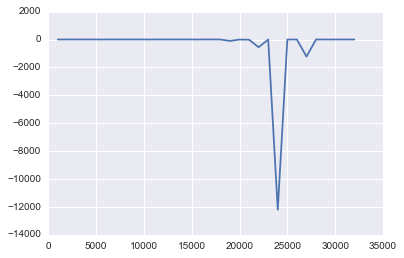

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.plot(range(1000,len(dframe),1000),scores)

In [ ]:
def listing_cleaner(entry):
    print entry
    

In [ ]:
df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'],
                    'C': [1, 2, 3]})
df

In [ ]:
pd.get_dummies(df, columns=['A','C'])

In [ ]:
listing_cleaner(my_dict['5465197037'])

In [ ]:
type(dframe['bath']['5399866740'])

## Clean up the data a bit
Right now the 'shared' and 'split' are included in number of bathrooms. If I were to convert that to a number I would consider a shared/split bathroom to be half or 0.5 of a bathroom.

In [ ]:
dframe.bath = dframe.bath.replace('shared',0.5)
dframe.bath = dframe.bath.replace('split',0.5)
dframe.smoking = dframe.smoking.replace(np.nan, 'smoking')
dframe.furnished = dframe.furnished.replace(np.nan,'not furnished')
dframe.wheelchair = dframe.wheelchair.replace(np.nan, 'not wheelchair accessible')

In [ ]:
dframe.describe()

In [ ]:
dframe.bed.unique()

In [ ]:
from sklearn.preprocessing import Imputer, LabelEncoder

In [ ]:
def meanimputer(column):
    imp = Imputer(missing_values='NaN', strategy='mean', axis=1)
    imp.fit(column)
    X = imp.transform(column)
    return X[0]

In [ ]:
arr = np.array([np.nan, 'house', 'boat', 'houseboat', 'house', np.nan, 'house','houseboat'])
prac_df = DataFrame()
prac_df['arr'] = arr
prac_df['arr']
modeimputer(prac_df['arr'])

In [ ]:

def modeimputer(column):

    le = LabelEncoder()
    column = le.fit_transform(column)
    print le.classes_
    print type(le.classes_[0])
    print column
    nan = le.transform([np.nan])[0]
    print nan
    print type(column)
    column = list(column)
    for _,i in enumerate(column):
        if i == nan:
            column[_] = np.nan
    
    imp = Imputer(missing_values='NaN', strategy='most_frequent', axis=1)
    imp.fit(column)

    X = imp.transform(column)
    
    for _,i in enumerate(X[0]):
        if np.isnan(i):
            X[_] = 0
    X = X.astype(int)


    Y = le.inverse_transform(X)

    return Y

In [ ]:
import pandas as pd
import numpy as np

from sklearn.base import TransformerMixin
class ModeImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.
        
        Credit:http://stackoverflow.com/questions/25239958/
        impute-categorical-missing-values-in-scikit-learn

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [ ]:
data = [
    ['a', 1, 2],
    ['b', 1, 1],
    ['b', 2, 2],
    [np.nan, np.nan, np.nan]
]

X = pd.DataFrame(data)
xt = ModeImputer().fit_transform(X)

print('before...')
print(X)
print('after...')
print(xt)

In [ ]:
dframe = ModeImputer().fit_transform(dframe)

In [ ]:
dframe.head()

In [ ]:
dframe.describe(include = 'all')

In [ ]:
dframe.bed.mean()

In [ ]:
dframe.parking.unique()

In [ ]:
u_dframe = DataFrame()
dframe['bath'] = meanimputer(dframe['bath'])
dframe['bed'] = meanimputer(dframe['bed'])
dframe['feet'] = meanimputer(dframe['feet'])
dframe['lat'] = meanimputer(dframe['lat'])
dframe['long'] = meanimputer(dframe['long'])








In [ ]:
dframe.head()

In [ ]:
dframe.describe(include='all')

In [ ]:
data = dframe[dframe.lat > 45.4][dframe.lat < 45.6][dframe.long < -122.0][dframe.long > -123.5]
plt.figure(figsize=(15,10))
plt.scatter(data = data, x = 'long',y='lat')


### It looks like Portland!!!
Let's cluster the data. Start by creating a list of [['lat','long'], ...]

In [ ]:
XYdf = dframe[dframe.lat > 45.4][dframe.lat < 45.6][dframe.long < -122.0][dframe.long > -123.5]
data = [[XYdf['lat'][i],XYdf['long'][i]] for i in XYdf.index]



We'll use K Means Clustering because that's the clustering method I recently learned in class! There may be others that work better, but this is the tool that I know

In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=40)
km.fit(data)
neighborhoods = km.cluster_centers_


In [ ]:
%pylab inline
figure(1,figsize=(20,12))
plot([row[1] for row in data],[row[0] for row in data],'b.')
for i in km.cluster_centers_:  
    plot(i[1],i[0], 'g*',ms=25)
'''Note to Riley: come back and make it look pretty'''

### We chose our neighborhoods!
I've found that every once in a while the centers end up in different points, but are fairly consistant. Now let's process our data points and figure out where the closest neighborhood center is to it!

In [ ]:
neighborhoods = neighborhoods.tolist()
for i in enumerate(neighborhoods):
    i[1].append(i[0])
print neighborhoods

Create a function that will label each point with a number coresponding to it's neighborhood

In [ ]:
def clusterer(X, Y,neighborhoods):
    neighbors = []
    for i in neighborhoods:
        distance = ((i[0]-X)**2 + (i[1]-Y)**2)
        neighbors.append(distance)
    closest = min(neighbors)
    return neighbors.index(closest)

In [ ]:
neighborhoodlist = []
for i in dframe.index:
    neighborhoodlist.append(clusterer(dframe['lat'][i],dframe['long'][i],neighborhoods))
dframe['neighborhood'] = neighborhoodlist


In [ ]:
dframe

### Here's the new Part. We're breaking out the neighborhood values into their own columns. Now the algorithms can read them as categorical data rather than continuous data.

In [ ]:
from sklearn import preprocessing
def CategoricalToBinary(dframe,column_name):
    le = preprocessing.LabelEncoder()
    listy = le.fit_transform(dframe[column_name])
    dframe[column_name] = listy
    unique = dframe[column_name].unique()
    serieslist = [list() for _ in xrange(len(unique))]
    
    
    for column, _ in enumerate(serieslist):
        for i, item in enumerate(dframe[column_name]):
            if item == column:
                serieslist[column].append(1)
            else:
                serieslist[column].append(0)
        dframe[column_name+str(column)] = serieslist[column]

   
    return dframe





In [ ]:
pd.set_option('max_columns', 100)
dframe = CategoricalToBinary(dframe,'housingtype')
dframe = CategoricalToBinary(dframe,'parking')
dframe = CategoricalToBinary(dframe,'laundry')
dframe = CategoricalToBinary(dframe,'smoking')
dframe = CategoricalToBinary(dframe,'wheelchair')
dframe = CategoricalToBinary(dframe,'neighborhood')
dframe


In [ ]:
dframe = dframe.drop('date',1)
dframe = dframe.drop('housingtype',1)
dframe = dframe.drop('parking',1)
dframe = dframe.drop('laundry',1)
dframe = dframe.drop('smoking',1)
dframe = dframe.drop('wheelchair',1)
dframe = dframe.drop('neighborhood',1)
dframe = dframe.drop('time',1)




In [ ]:
columns=list(dframe.columns)


In [ ]:
from __future__ import division
print len(dframe)
df2 = dframe[dframe.price < 10000][columns].dropna()
print len(df2)
print len(df2)/len(dframe)

price = df2[['price']].values
columns.pop(columns.index('price'))
features = df2[columns].values

from sklearn.cross_validation import train_test_split
features_train, features_test, price_train, price_test = train_test_split(features, price, test_size=0.1, random_state=42)

Ok, lets put it through Decision Tree!

## What about Random Forest?

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
reg = RandomForestRegressor()
reg = reg.fit(features_train, price_train)


In [ ]:
forest_pred = reg.predict(features_test)
forest_pred = np.array([[item] for item in forest_pred])

In [ ]:
print r2_score(forest_pred, price_test)
plt.scatter(forest_pred,price_test)


In [ ]:
df2['predictions'] = reg.predict(df2[columns])

In [ ]:
df2['predictions_diff'] = df2['predictions']-df2['price']

In [ ]:
sd = np.std(df2['predictions_diff'])
sns.kdeplot(df2['predictions_diff'][df2['predictions_diff']>-150][df2['predictions_diff']<150])
sns.plt.xlim(-150,150)

In [ ]:
data = df2[dframe.lat > 45.45][df2.lat < 45.6][df2.long < -122.4][df2.long > -122.8][df2['predictions_diff']>-150][df2['predictions_diff']<150]
plt.figure(figsize=(15,10))
plt.scatter(data = data, x = 'long',y='lat', c = 'predictions_diff',s=10,cmap='coolwarm')

In [ ]:
dframe

In [ ]:
print np.mean([1,2,34,np.nan])

In [ ]:
def averager(dframe):
    dframe = dframe.T
    dframe.dropna()
    averages = {}
    for listing in dframe:
        try:
            key = str(dframe[listing]['bed'])+','+str(dframe[listing]['bath'])+','+str(dframe[listing]['neighborhood'])+','+str(dframe[listing]['feet']-dframe[listing]['feet']%50)
            if key not in averages:
                averages[key] = {'average_list':[dframe[listing]['price']], 'average':0}
            elif key in averages:
                averages[key]['average_list'].append(dframe[listing]['price'])
        except TypeError:
            continue
    for entry in averages:
        averages[entry]['average'] = np.mean(averages[entry]['average_list'])
    return averages
            
        
            
            
        

In [ ]:
averages = averager(dframe)
print averages

In [ ]:
dframe['averages']= averages[str(dframe['bed'])+','+str(dframe['bath'])+','+str(dframe['neighborhood'])+','+str(dframe['feet']-dframe['feet']%50)]

In [ ]:
dframe.T


Wow! up to .87! That's our best yet! What if we add more trees???

In [ ]:
reg = RandomForestRegressor(n_estimators = 100)
reg = reg.fit(features_train, price_train)

In [ ]:
forest_pred = reg.predict(features_test)
forest_pred = np.array([[item] for item in forest_pred])

In [ ]:
print r2_score(forest_pred, price_test)
print plt.scatter(pred,price_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth = 5)
reg.fit(features_train, price_train)
print len(features_train[0])
columns = [str(x) for x in columns]
print columns
from sklearn.tree import export_graphviz
export_graphviz(reg,feature_names=columns)

Up to .88!

So what is our goal now? I'd like to see if adjusting the number of neighborhoods increases the accuracy. same for the affect with the number of trees

In [ ]:
def neighborhood_optimizer(dframe,neighborhood_number_range, counter_num):
    XYdf = dframe[dframe.lat > 45.4][dframe.lat < 45.6][dframe.long < -122.0][dframe.long > -123.5]
    data = [[XYdf['lat'][i],XYdf['long'][i]] for i in XYdf.index]
    r2_dict = []
    for i in neighborhood_number_range:
        counter = counter_num
        average_accuracy_list = []
        while counter > 0:
            km = KMeans(n_clusters=i)
            km.fit(data)
            neighborhoods = km.cluster_centers_
            neighborhoods = neighborhoods.tolist()
            for x in enumerate(neighborhoods):
                x[1].append(x[0])
            neighborhoodlist = []
            for z in dframe.index:
                neighborhoodlist.append(clusterer(dframe['lat'][z],dframe['long'][z],neighborhoods))
            dframecopy = dframe.copy()
            dframecopy['neighborhood'] = Series((neighborhoodlist), index=dframe.index)
            df2 = dframecopy[dframe.price < 10000][['bath','bed','feet','dog','cat','content','getphotos', 'hasmap', 'price','neighborhood']].dropna()
            features = df2[['bath','bed','feet','dog','cat','content','getphotos', 'hasmap', 'neighborhood']].values
            price = df2[['price']].values
            features_train, features_test, price_train, price_test = train_test_split(features, price, test_size=0.1)
            reg = RandomForestRegressor()
            reg = reg.fit(features_train, price_train)
            forest_pred = reg.predict(features_test)
            forest_pred = np.array([[item] for item in forest_pred])
            counter -= 1
            average_accuracy_list.append(r2_score(forest_pred, price_test))
        total = 0
        for entry in average_accuracy_list:
            total += entry
        r2_accuracy = total/len(average_accuracy_list)
        r2_dict.append((i,r2_accuracy))
    print r2_dict
    return r2_dict

In [ ]:
neighborhood_number_range = [i for _,i in enumerate(range(2,31,2))]
neighborhood_number_range

In [ ]:
r2_dict = neighborhood_optimizer(dframe,neighborhood_number_range,10)

In [ ]:
r2_dict[:][0]

In [ ]:
plt.scatter([x[0] for x in r2_dict],[x[1] for x in r2_dict])

Looks like the optimum is right around 10 or 11, and then starts to drop off. Let's get a little more granular and look at a smaller range

In [ ]:
neighborhood_number_range = [i for _,i in enumerate(range(7,15))]
neighborhood_number_range

In [ ]:
r2_dict = neighborhood_optimizer(dframe,neighborhood_number_range,10)

In [ ]:
print r2_dict
plt.scatter([x[0] for x in r2_dict],[x[1] for x in r2_dict])

Trying a few times, it looks like 10, 11 and 12 get the best results at ~.85. Of course, we'll need to redo some of these optomizations after we properly process our data. Hopefully we'll see some more consistency then too.

In [ ]:
r2_dict = neighborhood_optimizer(dframe,[10,11,12],25)

Note #1 to Riley: (From Last time) Perhaps look into another regressor? see if there's one that's inherantly better at this kind of thing.

Note #2 to Riley: Figure out how to process data so that you don't have to drop null values

Note #3 to Riley: convert categorical data into binary

Note #4 to Riley: I wonder if increasing the number of neighborhoods would become more accurate as we collect more data? like you could create a bunch of little accurate models instead of a bunch of bigger ones.

Learned: If you plan on using Decision Tree/Random Forest from SKLearn, make sure you collect your discrete variables in separate columns and make them binary yes or no(0 or 1).